In [4]:
%config Completer.use_jedi = False 

# Cleaning Data from Weather Stations #

**Step 1 - Upload and clean data from one single Weather stations.**


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Exploring Data Stations Data Set


df = pd.read_csv('Data/StationsRecords/DH-4554X.csv', sep = ';', header = None)



In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,NaN,NaN,NaN,...,9.9,NaN,8.5,9.9,NaN,NaN,NaN,NaN,NaN,NaN
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,NaN,NaN,NaN,...,12.1,NaN,10.3,12.1,NaN,NaN,NaN,NaN,NaN,NaN
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,NaN,NaN,NaN,...,13.7,NaN,12.3,13.7,NaN,NaN,NaN,NaN,NaN,NaN
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,NaN,NaN,NaN,...,16.1,NaN,14.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,NaN,NaN,NaN,...,17.3,NaN,16.3,17.3,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6        14
7     19305
8     19305
9     19305
10       13
11       11
12    19305
13    19305
14        2
15    19305
16        0
17    19305
18    19305
19    19305
20    19305
21    19305
22       50
23    19305
24    19305
25    19305
26    19305
27    19305
28    19305
29       50
30    19305
31       50
32       50
33    19305
34    19305
35    19305
36    19305
37    19305
38    19305
dtype: int64

In [7]:
# Importing just data-filled columns
df = pd.read_csv('Data/StationsRecords/DH-4554X.csv', sep = ';',
                 header = None,
                 usecols=[0,1,2,3,4,5,6,10,11,14,16,22,29,31,32],
                )

In [8]:
# Columns descrpition given within the documentation delivered with the csv in the data folder.

colnames = {0:'StationId',
           1:'Longitud',
           2:'Latitude',
           3:'Altutude',
            4:'StationName',
            5:'DateTime',
            6:'Precipitation',
            10:'WindMax',
            11:'Wind',
            14:'WindDirection',
            16:'WindDirectionMax',
            22:'RelHumidity',
            29:'AirTemperature',
            31:'AirMinTemp',
            32:'AirMaxTemp'}

df.rename(columns=colnames, inplace=True)

In [9]:
df.head()

,StationId,Longitud,Latitude,Altutude,StationName,DateTime,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,2.8,1.5,92.0,102.0,93.0,9.9,8.5,9.9
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,4.3,1.9,110.0,117.0,82.0,12.1,10.3,12.1
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,4.8,2.1,100.0,97.0,77.0,13.7,12.3,13.7
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,5.2,2.9,184.0,190.0,66.0,16.1,14.1,16.1
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,5.3,2.0,209.0,200.0,56.0,17.3,16.3,17.3


*Data from Stations is given in metric system, we are going to maintain it but for the wind that we would use knots instead of m/s 1 m/s. = 1.9438 Knots because is widely used in nautical domains.*

In [10]:
df.Wind = df.Wind * 1.9438
df.WindMax = df.WindMax * 1.9438 

In [11]:
df.head()

,StationId,Longitud,Latitude,Altutude,StationName,DateTime,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
0,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T09:00:00,0.0,5.44264,2.91570,92.0,102.0,93.0,9.9,8.5,9.9
1,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T10:00:00,0.0,8.35834,3.69322,110.0,117.0,82.0,12.1,10.3,12.1
2,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T11:00:00,0.0,9.33024,4.08198,100.0,97.0,77.0,13.7,12.3,13.7
3,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T12:00:00,0.0,10.10776,5.63702,184.0,190.0,66.0,16.1,14.1,16.1
4,4554X,-7.08361,37.218334,15.0,CARTAYA PEMARES,2019-02-16T13:00:00,0.0,10.30214,3.88760,209.0,200.0,56.0,17.3,16.3,17.3


In [12]:
df.describe()

,Longitud,Latitude,Altutude,Precipitation,WindMax,Wind,WindDirection,WindDirectionMax,RelHumidity,AirTemperature,AirMinTemp,AirMaxTemp
count,1.930500e+04,1.930500e+04,19305.0,19291.000000,19292.000000,19294.000000,19303.000000,19305.000000,19255.000000,19255.000000,19255.000000,19255.000000
mean,-7.083610e+00,3.721833e+01,15.0,0.044321,9.941874,4.759026,209.809201,209.048744,75.381927,16.974812,16.505214,17.440556
std,1.291445e-12,1.433202e-11,0.0,0.469344,5.141907,2.752149,110.732486,108.344691,17.747788,6.092386,6.048396,6.119123
min,-7.083610e+00,3.721833e+01,15.0,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,-1.200000,-1.200000,-0.900000
25%,-7.083610e+00,3.721833e+01,15.0,0.000000,5.831400,2.721320,124.000000,127.000000,63.000000,12.700000,12.300000,13.200000
50%,-7.083610e+00,3.721833e+01,15.0,0.000000,9.135860,4.276360,235.000000,235.000000,78.000000,16.900000,16.500000,17.300000
75%,-7.083610e+00,3.721833e+01,15.0,0.000000,13.217840,6.414540,311.000000,305.000000,91.000000,21.000000,20.500000,21.500000
max,-7.083610e+00,3.721833e+01,15.0,18.200000,50.150040,19.243620,360.000000,357.000000,100.000000,41.000000,40.200000,41.900000


In [13]:
df.dtypes

StationId            object
Longitud            float64
Latitude            float64
Altutude            float64
StationName          object
DateTime             object
Precipitation       float64
WindMax             float64
Wind                float64
WindDirection       float64
WindDirectionMax    float64
RelHumidity         float64
AirTemperature      float64
AirMinTemp          float64
AirMaxTemp          float64
dtype: object

In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

<AxesSubplot:xlabel='WindDirection', ylabel='Count'>

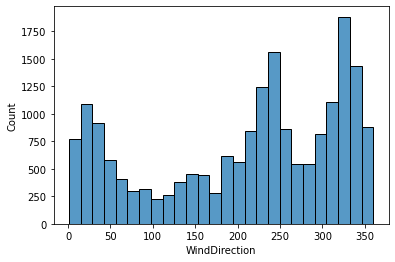

In [15]:
sns.histplot(data=df, x='WindDirection') # Distribution of most common wind directions

**Step 2 - Loop for loading all data station in one single DataFrame**

In [16]:
path = 'Data/StationsRecords/'
csvs= ['DH-4554X.csv', 'DH-6001.csv', 'DH-6329X.csv']

In [61]:
# Loop for uploading all csv station files in one single DataFrame


stations = pd.DataFrame() # reset of df
for i in csvs: #
    df = pd.read_csv(path + i, sep = ';',
                     header = None,
                     usecols=[0,1,2,3,4,5,6,10,11,14,16,22,29,31,32])
    stations = pd.concat([stations,df],axis = 0)
            


In [62]:
# Columns descrpition given within the documentation delivered with the csv in the data folder.

colnames = {0:'StationId',
           1:'Longitud',
           2:'Latitude',
           3:'Altutude',
            4:'StationName',
            5:'DateTime',
            6:'Precipitation',
            10:'WindMax',
            11:'Wind',
            14:'WindDirection',
            16:'WindDirectionMax',
            22:'RelHumidity',
            29:'AirTemperature',
            31:'AirMinTemp',
            32:'AirMaxTemp'}

stations.rename(columns=colnames, inplace=True)

In [63]:
stations['StationName'].value_counts() # Fast check if we properly upload all the registers

CABO DE GATA  FARO    19592
CARTAYA   PEMARES     19305
TARIFA                19110
Name: StationName, dtype: int64

In [64]:
# wind measurements from m/s to knots 
stations.Wind = stations.Wind * 1.9438
stations.WindMax = stations.WindMax * 1.9438 

# Cleaning Historical Forecast Data #

**Step 1 - Data set exploring**

In [17]:
# We are going to see how it looks like.
# It is a very big dataset that would require a big computing time if open completely so were going to  just open few rows to inspect.

historicalForecast = pd.read_csv('Data/historicalForecast.csv', nrows = 1000)


In [18]:
pd.set_option('display.max_rows', None)
historicalForecast.head(100)

,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,humidity,clouds,wind_speed,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
0,1507507200,2017-10-09 00:00:00 +0000 UTC,1507507200,2017-10-09 00:00:00 +0000 UTC,36.013158,-5.598892,19.67,19.00,1018.448,1017.336,95.600,NaN,3.722,80.801,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
1,1507507200,2017-10-09 00:00:00 +0000 UTC,1507518000,2017-10-09 03:00:00 +0000 UTC,36.013158,-5.598892,19.54,18.75,1017.801,1016.569,95.265,9.0,3.843,86.763,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
2,1507507200,2017-10-09 00:00:00 +0000 UTC,1507528800,2017-10-09 06:00:00 +0000 UTC,36.013158,-5.598892,19.44,18.55,1017.759,1016.405,94.600,6.0,3.512,92.252,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
3,1507507200,2017-10-09 00:00:00 +0000 UTC,1507539600,2017-10-09 09:00:00 +0000 UTC,36.013158,-5.598892,20.39,18.48,1018.645,1017.271,88.525,0.0,3.488,90.164,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
4,1507507200,2017-10-09 00:00:00 +0000 UTC,1507550400,2017-10-09 12:00:00 +0000 UTC,36.013158,-5.598892,22.26,17.87,1018.389,1017.104,75.800,0.0,4.136,100.970,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
5,1507507200,2017-10-09 00:00:00 +0000 UTC,1507561200,2017-10-09 15:00:00 +0000 UTC,36.013158,-5.598892,22.64,17.50,1016.735,1015.625,72.800,0.0,4.567,105.883,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
6,1507507200,2017-10-09 00:00:00 +0000 UTC,1507572000,2017-10-09 18:00:00 +0000 UTC,36.013158,-5.598892,21.22,18.02,1016.837,1015.876,81.800,0.0,3.608,88.460,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
7,1507507200,2017-10-09 00:00:00 +0000 UTC,1507582800,2017-10-09 21:00:00 +0000 UTC,36.013158,-5.598892,20.37,17.95,1018.153,1017.209,86.300,0.0,3.689,76.054,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
8,1507507200,2017-10-09 00:00:00 +0000 UTC,1507593600,2017-10-10 00:00:00 +0000 UTC,36.013158,-5.598892,20.22,18.25,1017.759,1016.731,88.400,0.0,4.127,78.312,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
9,1507507200,2017-10-09 00:00:00 +0000 UTC,1507604400,2017-10-10 03:00:00 +0000 UTC,36.013158,-5.598892,20.10,18.51,1017.118,1016.065,90.616,0.0,4.613,75.937,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0


In [61]:
# We have two dates in each row: 
# 1- forecast dt(when the forecast was made)
# 2- slice dt (date for witch the forecast was made)
# We re going to check how many slice dt are predicted in each forecast dt:

historicalForecast[historicalForecast['forecast dt unixtime']==1507507200]


,forecast dt unixtime,forecast dt iso,slice dt unixtime,slice dt iso,lat,lon,temperature,dew_point,pressure,ground_pressure,humidity,clouds,wind_speed,wind_deg,rain,snow,ice,fr_rain,convective,snow_depth,accumulated,hours,rate
0,1507507200,2017-10-09 00:00:00 +0000 UTC,1507507200,2017-10-09 00:00:00 +0000 UTC,36.013158,-5.598892,19.67,19.00,1018.448,1017.336,95.600,NaN,3.722,80.801,NaN,NaN,NaN,NaN,NaN,999900026055400900000,NaN,NaN,NaN
1,1507507200,2017-10-09 00:00:00 +0000 UTC,1507518000,2017-10-09 03:00:00 +0000 UTC,36.013158,-5.598892,19.54,18.75,1017.801,1016.569,95.265,9.0,3.843,86.763,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
2,1507507200,2017-10-09 00:00:00 +0000 UTC,1507528800,2017-10-09 06:00:00 +0000 UTC,36.013158,-5.598892,19.44,18.55,1017.759,1016.405,94.600,6.0,3.512,92.252,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
3,1507507200,2017-10-09 00:00:00 +0000 UTC,1507539600,2017-10-09 09:00:00 +0000 UTC,36.013158,-5.598892,20.39,18.48,1018.645,1017.271,88.525,0.0,3.488,90.164,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
4,1507507200,2017-10-09 00:00:00 +0000 UTC,1507550400,2017-10-09 12:00:00 +0000 UTC,36.013158,-5.598892,22.26,17.87,1018.389,1017.104,75.800,0.0,4.136,100.970,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
5,1507507200,2017-10-09 00:00:00 +0000 UTC,1507561200,2017-10-09 15:00:00 +0000 UTC,36.013158,-5.598892,22.64,17.50,1016.735,1015.625,72.800,0.0,4.567,105.883,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
6,1507507200,2017-10-09 00:00:00 +0000 UTC,1507572000,2017-10-09 18:00:00 +0000 UTC,36.013158,-5.598892,21.22,18.02,1016.837,1015.876,81.800,0.0,3.608,88.460,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
7,1507507200,2017-10-09 00:00:00 +0000 UTC,1507582800,2017-10-09 21:00:00 +0000 UTC,36.013158,-5.598892,20.37,17.95,1018.153,1017.209,86.300,0.0,3.689,76.054,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0
8,1507507200,2017-10-09 00:00:00 +0000 UTC,1507593600,2017-10-10 00:00:00 +0000 UTC,36.013158,-5.598892,20.22,18.25,1017.759,1016.731,88.400,0.0,4.127,78.312,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,6.0,0.0
9,1507507200,2017-10-09 00:00:00 +0000 UTC,1507604400,2017-10-10 03:00:00 +0000 UTC,36.013158,-5.598892,20.10,18.51,1017.118,1016.065,90.616,0.0,4.613,75.937,0.000,0.0,0.0,0.0,0.000,999900026055400900000,0.000,3.0,0.0


In [56]:
# ... so for each forecast dt, we have 93 silce dt predictions starting in 3 hours intervals and finishing in 12 h intervals.
# Let see now what is the frequency of forecast dt (how often a new forecast is provided):


historicalForecast['forecast dt iso'].value_counts()


2017-10-09 12:00:00 +0000 UTC    93
2017-10-10 12:00:00 +0000 UTC    93
2017-10-11 06:00:00 +0000 UTC    93
2017-10-09 18:00:00 +0000 UTC    93
2017-10-09 00:00:00 +0000 UTC    93
2017-10-09 06:00:00 +0000 UTC    93
2017-10-10 00:00:00 +0000 UTC    93
2017-10-10 06:00:00 +0000 UTC    93
2017-10-11 00:00:00 +0000 UTC    93
2017-10-10 18:00:00 +0000 UTC    93
2017-10-11 12:00:00 +0000 UTC    70
Name: forecast dt iso, dtype: int64

 ... so we can see there are 4 predictions dayly (by 00.00, 06.00, 12.00, 18.00). That means for an specific datetime there will 93 different predictions, that will be updated each 6 hours. Obviously, the more recent the forecast the more accurate it will be. 

For the purpose of this project and in order to simplify the data, we are going to maintain just one forecast for each "slice dt". The forecast selected will be the one made in the same day at 00.00 h that should be very accurate. 

The goal of the project however will be to improve such accuracy, training a model with the forecast data as features and the station actual data as targets (what is a challeging objective !!)

**Summurazing: for each date, the forecast made by 00.00 hour will be kept as a prediction for the next 24 hours. The prediction interval for slice dt prediction for the first 24 hours is 3 hours, so we will maintain (24h/3h) 8 slice dt per forecast**